# NSU, vaje 3

### A: Meta klasifikacija in meta regresija.
A.1: Uporabi meta podatke iz prejsnjih dveh nalog. Razbij jih na testno in ucno mnozico. 
pyMFE nekaterih meta značilk ni mogel izračunati, zato podatki vsebujejo nekaj manjkajočih vrednosti. Odstrani stolpce z njimi.

In [1]:

import numpy as np
import pandas as pd

x_meta_all = pd.read_csv("meta_features.csv")
x_meta = x_meta_all.dropna(axis=1).drop('name', axis=1)

y_meta_all = pd.read_csv("meta_target.csv")

In [2]:
x_meta

,attr_conc.mean,attr_conc.sd,attr_ent.mean,attr_ent.sd,attr_to_inst,cat_to_num,class_conc.mean,class_conc.sd,class_ent,eq_num_attr,...,nodes_per_inst,nodes_per_level.mean,nodes_repeated.mean,tree_depth.mean,tree_depth.sd,tree_imbalance.mean,tree_shape.mean,tree_shape.sd,var_importance.mean,var_importance.sd
0,0.209222,0.119950,2.279010,5.742642e-02,0.026667,0.0,0.272326,0.142589,1.584963,1.882408,...,0.053333,1.600000,2.000000,3.058824,1.434860,0.194917,0.270833,0.107120,0.250000,0.278239
1,0.186128,0.226804,0.761123,3.740142e-01,0.158416,0.0,0.593161,0.304557,2.390560,5.102573,...,0.089109,1.285714,1.125000,4.105263,2.131633,0.133181,0.207813,0.179487,0.062500,0.106235
2,0.076058,0.051457,2.317271,8.810632e-03,0.073034,0.0,0.152845,0.071451,1.566822,3.182758,...,0.061798,2.200000,1.833333,2.956522,1.260529,0.238917,0.286458,0.085148,0.076923,0.135495
3,0.036065,0.030615,1.737425,1.297673e-01,0.025000,0.0,0.077131,0.048188,1.515466,7.288489,...,0.150000,2.400000,6.000000,6.734694,2.643983,0.088969,0.088047,0.145569,0.250000,0.171457
4,0.028040,0.012783,2.000000,0.000000e+00,0.500000,0.0,0.013175,0.015654,0.958042,32.535642,...,0.100000,2.500000,1.250000,2.857143,1.195229,0.258001,0.295455,0.084275,0.020000,0.076174
5,0.009696,0.008027,1.517821,1.833330e-01,0.050000,0.0,0.060243,0.133851,0.999351,16.815883,...,0.175000,3.888889,3.888889,4.929577,1.823058,0.117964,0.125326,0.091195,0.100000,0.125000
6,0.089493,0.106381,2.000000,0.000000e+00,0.050000,0.0,0.042889,0.040935,0.970951,9.534318,...,0.150000,1.875000,3.000000,4.064516,2.048341,0.118626,0.208496,0.142942,0.200000,0.156068
7,0.129066,0.088687,1.998113,2.195144e-03,0.027027,0.0,0.043505,0.028962,0.998536,10.100513,...,0.279279,2.818182,10.333333,5.936508,2.693319,0.085331,0.114777,0.130087,0.333333,0.224166
8,0.104842,0.183616,2.306292,8.090571e-02,0.164948,0.0,0.008079,0.005075,0.996240,42.303315,...,0.175258,3.400000,1.789474,5.217391,2.147978,0.105125,0.123158,0.104500,0.031250,0.035493
9,0.024960,0.009571,2.000000,0.000000e+00,0.050000,0.0,0.041975,0.022654,0.995378,10.501098,...,0.170000,1.700000,3.400000,4.685714,2.609614,0.092267,0.185655,0.149728,0.200000,0.126359


In [3]:
y_meta_all

,name,knn,tree,bayes,best
0,iris,0.973684,0.947368,0.973684,knn
1,zoo,0.807692,0.923077,0.923077,tree
2,wine,0.644444,0.888889,0.977778,bayes
3,hayes-roth,0.550000,0.900000,0.725000,tree
4,fri_c3_100_50,0.520000,0.880000,0.560000,tree
5,pwLinear,0.880000,0.820000,0.840000,knn
6,fri_c2_100_5,0.840000,0.840000,0.880000,bayes
7,visualizing_environmental,0.642857,0.714286,0.607143,tree
8,wisconsin,0.591837,0.612245,0.632653,bayes
9,fri_c0_100_5,0.880000,0.840000,0.960000,bayes


In [4]:
y_meta_all['best']

0       knn
1      tree
2     bayes
3      tree
4      tree
5       knn
6     bayes
7      tree
8     bayes
9     bayes
10      knn
11     tree
12      knn
13     tree
14     tree
15      knn
16     tree
17     tree
18     tree
19     tree
20     tree
21    bayes
22     tree
23     tree
24      knn
25    bayes
26      knn
27     tree
28     tree
29      knn
30      knn
31      knn
32      knn
33    bayes
34      knn
35      knn
36      knn
37      knn
38     tree
39    bayes
40      knn
41      knn
42    bayes
43      knn
44     tree
45      knn
46    bayes
47      knn
48      knn
49      knn
50      knn
51      knn
Name: best, dtype: object

A.2: Natreniraj meta model z metodo naključnega gozda, ki bo napovedal, katera izmed metod drevo, 1NN in Bayes dela najbolje na sestavljenih meta podatkih. 
Za testiranje uporabi 5-kratno prečno preverjanje. Natančnost meta modela primerjaj z natančnostjo modela, ki vedno napove povprečno vrednost ciljne spremenjivke na učni množici (pomagaš si lahko z **sklearn.dummy.DummyClassifier**).

Kakšna se ti zdi uspešnost meta modela?

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
#rfc.fit(x_meta, y_meta_all)
dummy = DummyClassifier()
#dummy.fit(x_meta, y_meta_all)
x = cross_validate(rfc, x_meta, y_meta_all['best'], cv=5)
print(x)
print(x['test_score'].mean())

{'fit_time': array([0.11316586, 0.11173224, 0.10887074, 0.10709143, 0.1078918 ]), 'score_time': array([0.00752378, 0.00805688, 0.00740504, 0.00794268, 0.00794911]), 'test_score': array([0.45454545, 0.63636364, 0.6       , 0.8       , 0.6       ])}
0.6181818181818183


In [6]:
x_dummy = cross_validate(dummy, x_meta, y_meta_all['best'], cv=5)
print(x_dummy)
print(x_dummy['test_score'].mean())

{'fit_time': array([0.00112247, 0.00064802, 0.00065708, 0.00081444, 0.00117254]), 'score_time': array([0.00051308, 0.00043201, 0.0003953 , 0.00086737, 0.00054479]), 'test_score': array([0.45454545, 0.45454545, 0.5       , 0.5       , 0.4       ])}
0.4618181818181818


A.3: Naše meta podatke sestavlja kar nekaj različnih meta značilk. Katere so pa zares pomembne in koristne? 
Nekatere metode strojnega učenja nam omogočajo oceno pomembnosti značilk, ki nam lahko pomaga odgovoriti na to vprašanje. Primeri takšnih metod so logistična regresija (izračunamo iz koeficientov **model.coef_**), odločitveno drevo (**model.feature_importances_**) in naključni gozd (**model.feature_importances_**).

Katerih 5 meta značilk je najpomembnejših? Izriši še stolpični diagram (**plt.bar**) pomembnosti meta značilk.

/home/tadej/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<BarContainer object of 45 artists>

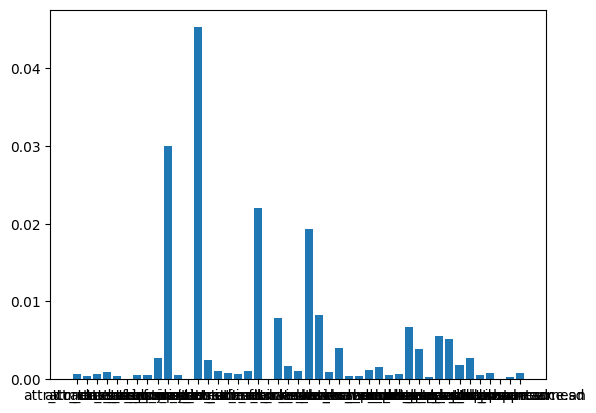

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
#LOGREG
lgr = LogisticRegression()
lgr.fit(x_meta, y_meta_all['best'])
#plt.bar(lgr.coef_)
# DOPOLNI
plt.bar(x_meta.columns.values, np.abs(lgr.coef_[0]))

<BarContainer object of 45 artists>

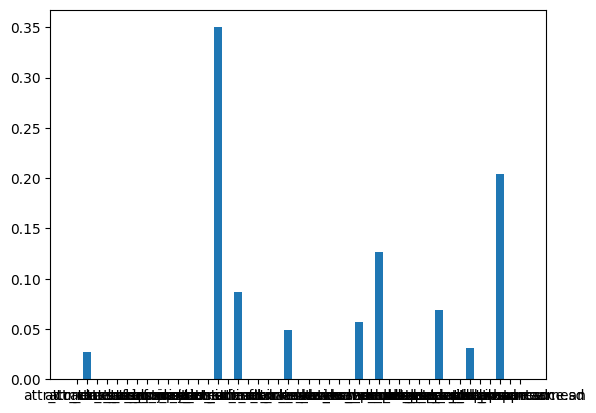

In [8]:
dtc = DecisionTreeClassifier()
dtc.fit(x_meta, y_meta_all['best'])

plt.bar(x_meta.columns.values, dtc.feature_importances_)

<BarContainer object of 45 artists>

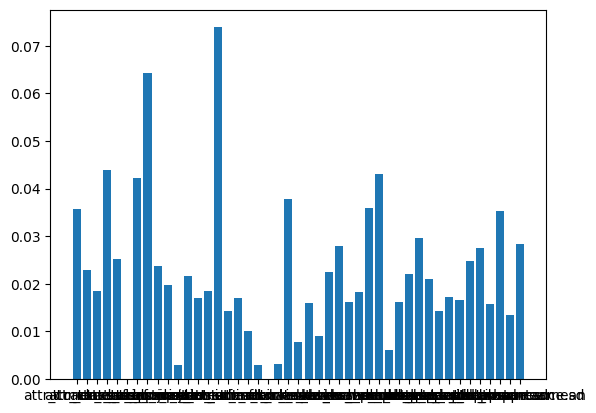

In [9]:
rfc = RandomForestClassifier()
rfc.fit(x_meta, y_meta_all['best'])
plt.bar(x_meta.columns.values, rfc.feature_importances_)

A.4: Preizkusimo še meta regresijo. Za vsako od naših treh metod strojnega učenja nauči meta model, ki napoveduje njegovo natančnost. Kolikšen je $R^2$ vsakega meta modela, izračunana s 5-kratnim prečnim preverjanjem?

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
results = []
for method in y_meta_all.columns.values[1:4]:
    rfr = RandomForestRegressor()
    #rfr.fit(x_meta, y_meta_all['method'])
    r = cross_validate(rfr, x_meta, y_meta_all[method], cv=5, scoring='r2')
    print(r['test_score'].mean())
    results.append(r['test_score'].mean())


# DOPOLNI

0.10244169664395204
0.17967398212907973
0.09467828022463502


A.DODATNO: S posamičnimi regresijskimi meta modeli za natančost iz A.3 lahko napovedujemo tudi najboljši model, tako da pogledamo, katerera od napovedanih natančnosti je najvišja. Primerjaj napovedi najboljšega modela z meta klasifikacijo in z meta regresijo. Katera se obnese bolje?

In [11]:
from sklearn.model_selection import train_test_split
best = np.argmax(results)

x1, x2, y1, y2 = train_test_split(x_meta, y_meta_all)

In [12]:
rfr = {}
scores = {}
for method in y_meta_all.columns.values[1:4]:
    rfr[method] = RandomForestRegressor()
    rfr[method].fit(x1, y1[method])
    scores[method]=rfr[method].predict(x2)

### B: Optimizacija hiperparametrov
Vse razen najpreprostejših metod strojnega učenja imajo eno ali več nastavitev, ki jim pravimo hiperparametri. Primerna nastavitev hiperparametrov za dane podatke je pogosto prav tako pomembna kot izbira primerne metode. V knjižnici scikit-learn lahko seznam hiperparametrov vsake metode najdemo s klicem **model.get_params()**, da jih zares razumemo, pa je treba pogledati v dokumentacijo ali pa celo prebrati članek o metodi. 

B.1 Naredi model odločitvenega drevesa ter se poigraj z njegovimi hiperparametri. Verjetno bosta najpomembnejša **max_depth** in **min_samples_split**. Za računje uspešnosti modela uporabi metriko $R^2$ in prečno preverjanje.

In [13]:
import numpy as np
import pandas as pd

data = pd.read_csv("drugi_del_podatki.csv")
x = data.drop("y", axis=1)
y = data["y"]
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_split=600, max_depth=None)
cross_validate(dtr, x_train, y_train, scoring='r2')['test_score'].mean()
# DOPOLNI

0.26713077554027204

B.2 Iskanje najboljših hiperparametrov lahko razumemo kot optimizacijski problem. Sci-kit learn nam ponuja nekaj orodij za avtomatsko optimizacijo. Najpreprostejša je **sklearn.model_selection.GridSearchCV**, ki preišče celoten kartezični produkt vrednosti hiperparametrov, ki nas zanimajo.
Uporabi grid search, da preiščeš kombinacije hiperparametrov **2 <= max_depth < 50** in **2 <= min_samples_split < 400**. 
Metodi grid search nastavi **cv=5**, da bo izvajala notranje prečno preverjanje. Koristna nastavitev je tudi **refit=True**.

Pomembno se je zavedati, da pri resni optimizaciji hiperparametrov prilagajamo model na celotno množico podatkov. Zato je dobra praksa pred optimizacijo ločiti podatke na učno in testno množico ter izvesti optimizacijo na učni množici, končni model pa evaluirati na testni množici. 
(Obstaja celo možnost gnezdenega prečnega preverjanja, a to pustimo za drugič.)

Po opravljeni optimizaciji hiperparametrov lahko dobimo najboljše vrednosti z **grid_search.best_params_**, natreniran najboljši model pa z **grid_search.best_estimator_** (če smo nastavili refit=True).

In [16]:
from sklearn.model_selection import GridSearchCV, train_test_split
params = {'max_depth': [i for i in range(2, 50, 3)], 'min_samples_split': [i for i in range(2, 400, 10)]}
gscv = GridSearchCV(DecisionTreeRegressor(), param_grid=params, n_jobs=-1)
gscv.fit(x_test, y_test)
# DOPOLNI

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
                                       35, 38, 41, 44, 47],
                         'min_samples_split': [2, 12, 22, 32, 42, 52, 62, 72,
                                               82, 92, 102, 112, 122, 132, 142,
                                               152, 162, 172, 182, 192, 202,
                                               212, 222, 232, 242, 252, 262,
                                               272, 282, 292, ...]})

In [ ]:
# 18.8 -> 7s
gscv.best_params_

{'max_depth': 11, 'min_samples_split': 82}

B.3 Nariši še 2D vizualizacijo metrike $R^2$ za vse preizkušene kombinacije hiperparametrov. Pomagaš si lahko z **grid_search.param_grid**, **np.reshape**, **plt.imshow**.

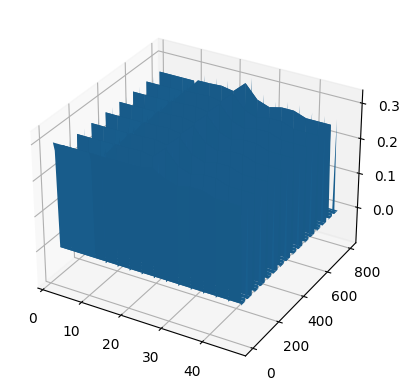

In [17]:
import matplotlib.pyplot as plt
p1 = gscv.param_grid['max_depth']
p2 = gscv.param_grid['min_samples_split']
out = gscv.cv_results_['mean_test_score'].reshape((len(p2),len(p1)))
from numpy import meshgrid
X,Y = meshgrid(p1, p2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(X,Y, out)

# DOPOLNI

B.DODATNO: poglej si in preizkusi še **RandomizedSearchCV**, **HalvingGridSearchCV** ter **HalvingRandomSearchCV**. Opisani so tukaj: https://scikit-learn.org/stable/modules/grid_search.html.